In [244]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [1]:
pwd

'C:\\Users\\이동환\\Desktop'

# 검색어, 정렬기준, 검색기간 설정

In [170]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩하고 검색어를 입력 받습니다.

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm import tqdm_notebook

### ★입력해야 할 부분★

In [132]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?: ')
# query_txt2 = input('2.제외할 첫번째 키워드를 입력하세요: ')
# query_txt3 = input('3.제외할 두번째 키워드를 입력하세요: ')

start_date = input('4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :')
end_date = input('5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): ')

1.크롤링할 키워드는 무엇입니까?: 이재용
4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :20200608
5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): 20200614


In [134]:
#Step 1. 크롬 웹브라우저 실행
path = "chromedriver.exe"
driver = webdriver.Chrome(path)
# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)

#Step 2. 네이버 검색창에 "이재용" 검색
element = driver.find_element_by_id("query")
element.send_keys(query_txt)  # query_txt는 위에서 입력한 '이재용'
element.submit()

#Step 3. "블로그" 카테고리 선택
driver.find_element_by_link_text("블로그").click( )    # .click() 괄호 안을 눌러라는 뜻

#Step 4. 오른쪽의 검색 옵션 버튼 클릭
driver.find_element_by_id("_search_option_btn").click( )

#Step 5. 정렬 : "관련도순" 
# 개발자 도구에서 정렬 버튼의 id 가 보이지 않습니다.
# 이럴 경우 쉽게 사용할 수 있는 방법이 바로 xpath 를 이용하는 방법입니다.
# xpath는 개발자 도구에서 해당 메뉴 부분을 마우스 오른쪽 버튼을 누르고 
# copy -> copy xpath 를 선택하면 됩니다
# xpath 에 대한 자세한 내용은 이번 장의 뒷 부분을 참고하세요.

driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click( )  # 정렬 버튼의 xpath 클릭
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click( ) # 관련도순 xpath

In [137]:
#Step 6. 날짜 입력
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
time.sleep(2)

# 이 부분이 아주 중요합니다.
# 날짜 부분에 날짜를 입력할 때 입력 속도가 너무 빠를 경우 날짜가 입력이 되다가 
# 오타가 나오는 경우가 많습니다.
# 그래서 날짜를 입력할 때 for 반복문을 사용해서 1 글자씩 입력하도록 코딩했습니다.

# 시작 날짜 입력하기
s_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""")     
driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""").click()
s_date.clear( )  # 날짜 입력 부분에 기존에 입력되어 있던 날짜를 제거합니다. 
time.sleep(1)
# 아래 코드가 날짜를 for 반복문으로 1 글자씩 입력하는 부분입니다.
for c in start_date:
    s_date.send_keys(c)
    time.sleep(0.3)
    
# 종료 날짜 입력하기
e_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""")
driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""").click()
e_date.clear()
time.sleep(1)

for c in end_date:
    e_date.send_keys(c)
    time.sleep(0.3)
    
# Step7. 날짜 입력 "적용하기" 버튼을 클릭 합니다.  
driver.find_element_by_class_name("tx").click()
time.sleep(2)

In [111]:
# # Step 8. 상세 검색버튼을 클릭 후 제외할 단어들을 설정합니다.
# ele2 = driver.find_element_by_id("inpop3")
# ele2.send_keys(query_txt2)
# ele2.send_keys(',')
# ele2.send_keys(query_txt3)
# driver.find_element_by_css_selector(".btn_ft.ty_green._search").click( )

# 1. 영장 후 제목 크롤링

## 글 url,제목 크롤링

In [138]:
titles = "a.sh_blog_title._sp_each_url._sp_each_title"
article_raw = driver.find_elements_by_css_selector(titles)              
article_raw

[<selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55afb", element="0.28819445543248645-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="46e77c11c7ad029e027e80ba48d55a

In [139]:
url_list = []
title_list = []

total_page = 99
for i in tqdm_notebook(range(0, total_page)):  # 페이지 번호
    i = i*10 + 1
    url = "https://search.naver.com/search.naver?date_from=20200608&date_option=8&date_to=20200614&dup_remove=1&nso=p%3Afrom20200608to20200614&post_blogurl=&post_blogurl_without=&query=%EC%9D%B4%EC%9E%AC%EC%9A%A9&sm=tab_pge&srchby=all&st=sim&where=post&start={}".format(i)
    driver.get(url)
    time.sleep(0.5)
    
    # URL 크롤링 시작
    titles = "a.sh_blog_title._sp_each_url._sp_each_title"
    article_raw = driver.find_elements_by_css_selector(titles)
#     article_raw

    # url 크롤링 시작    
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.get_attribute('title')   
        title_list.append(title)
    
        print(title)
    
print(len(url_list))
print(len(title_list))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야
이재용 부회장 영장실질심사
이재용 영장 기각... 법원 "구속 필요성 소명 부족"
문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?
삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다
이재용 구속영장 청구, 호텔신라가 왜 뜰까?
이재용 삼성전자 부회장 구속 영장 청구 이유 정리
이재용 구속, 한국 대통령에게는 사면권이 있다
이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다
삼성 이재용의 구속기각을 보며
오늘 새벽 삼성 이재용 부회장의 구속영장이 기각되었습니다
이재용 영장 기각... 법원 "구속 필요성 소명 부족"
<삼성 이재용 부회장 영장 기각> 삼성 최악 모면
[외전 14] 삼성의 이재용 부회장의 판결을 바라보는 국민들의 시선들
4.15 부정선거와 삼성 이재용의 차기 대권 도전 선언
경제신문스크랩 - 이재용 불구속 … 한숨 돌린 삼성
법원 9일 이재용 삼성전자 부회장 구속영장 기각 사법개혁이 필요한 이유
초호화 변호인단이 이재용 구속 막았다?
[중국어 공부/기사해석] 이재용 영장심사
이재용 구속영장 기각하는 삼성재벌공화국 법원 판사
이재용 구속 영장 기각 선처 vs 법대로
삼성 이재용 부회장 재구속위기 영장발부 심사중-재벌과 기업총수들 이제 그만 괴롭히고 본연의 일을 하도록 해야
이재용삼성부회장영장기각/2020년6월9일화요일
오늘 삼성 이재용 부회장의 재구속 여부가 결정됩니다
이재용 부회장, 3년 7개월 째 수사 받으며 세 번째 영장심사…항소심 집행유예 석방 854일 만
[속보] 삼성그룹 이재용 경영권 불법승계 의혹 구속영장심사, 국민 60%선처 의견, 2년4개월만에 구속위기
이재용 구속영장 기각, 또 고비 넘긴 삼성[신지식인소셜포럼]
이재용 삼성전자 부회장 구속영장 기각
이재용 앞에 한없이 관대한 사법부, 언론
삼성(이재용)만 만나면...
이재용 영장 기각
검찰 이재용 부회장 경영권 불법 승계 불기소 명분 쌓기
‘남북채널 차단’ ‘이재용

이재용(52) 삼성물산 부회장 구치소× 20200608 파이 外
이재용 부회장 구속 갈림길 속 삼성증권 세무조사 쏠린 '눈'
[단독] 이재용이 진두지휘?…"골드만삭스에도 물어봤다"
[이음] 이재용 수사에 제동 건 법원.."구속 필요성 소명 부족"
이재용 사건 수사심의회 결정과 죄악 투성이인 인간세상
“‘이건희 무죄’ 양창수 위원장, ‘이재용 기소 여부 심의’서 손 떼라”
삼성 이재용 부회장 8일 오전 영장 심사 재계
[공공투데이] [종합] 이재용,위기 탈출...검찰은 수사차질 불가피
구속 면한 이재용, 소감 묻자 "늦게까지 고생하셨습니다"
이재용 삼성전자 부회장, 구속영장 기각
이재용 부회장 구속영장 기각 아쉬운 점 & 박용진은 삼성 도우미? _ KBS〈김경래의 최강시사〉
이재용 부회장 서울구치소 도착…구속 여부는 밤 늦게
이재용, 영장심사
이재용 구출하기! - 일단 성공? 원정숙판사의 업보
삼성전자 이재용부회장 경영전념하게 해야..
삼성전자 이재용부회장 관련 육효로 뽑아보니...
'운명의 날' 맞은 이재용...삼성그룹에는 위기감 최고조
검꽃 윤석열의 방편 “양아치꽃 양정철, 유시민·이재용” [안정권 썰방]
[연합뉴스tv] '삼성 합병·승계 의혹' 이재용 부회장 구속 기로
[이재용 영장기각] '한숨 돌린' 삼성
이재용 영장기각, 삼성경영권승계 총정리, 삼성바이오로직스 분식회계,삼성전자, 제일모직, 에버랜드,삼성생명,삼성물산
이재용 부회장 구속영장 기각에 삼성 "최악 피했다" 안도
# 127: 이재용 구속영장 재청구? "검찰 수사심의위원회 소집", 영혼 없는 검찰의 74자짜리 불구속 입장문에 숨겨진 진심!
이재용 구속영장 기각 뜻 나이 키 학력 병역 재산
법원, 이재용 구속영장 기각…노병한 박사 예견 맞아
이재용 구속영장 기각 서울 강남 대형교회 자식에게 물려줘도 세금 한뿐 안내는 세상에서 무슨
[이재용 기사회생]삼성, 오너리스크 한숨 돌렸다…반도체 투자 UP
이재용 두번째 구속위기…외신 '한국 상속체계'주목
이재용 구속 갈림길, 빅데이터로 국민 생각 들여다보니

[공유] 삼성 "시간이 없다"....이재용, 영장 기각되자 현안부터 챙겼다https://a.msn.com/r/2/BB15ej6p
6월 9일(화) 경제 뉴스 : 이재용 구속영장 기각, 기본소득 논쟁, 2030 고용, 실업급여 1조, 꼬마빌딩, 서울 청약, 공매도 금지, 항공주, -5.2% 성장, 포스코 휴업
"이재용 구속영장은 檢의 무리수"… 커지는 ‘불구속 재판’ 여론
구속영장이 기각된 이재용 삼성전자 부회장이 9일 새벽 경기 의왕시 서울구치소에서 나오고 있다.
[내일신문 2020. 6. 12.자 기사] 이재용 부회장 기소여부 검찰수사심의위서 판단–경찰 조사, 검찰 수사사건, 형사1심, 형사2심 재판사건 등 대구 형사전문변호사 천주현 박사
[허환구의 라디오오늘] 이재용 부회장, 어떻게 봐야하나? 일본 또 다시 경제보복? 일본의 행동, 허세인가?
삼성 경영승계 의혹 사실상 승부처…이재용 구속 여부 긴장 최고조
퍼옴 = 이재용 삼성전자 부회장 구속에 대한 허경영의 날카로운 일침! [♥유튜브지원♥]=본좌섭리회가입→ http://본좌섭리회.com 원본영상시청 ▶ https://www.yout
2020.06.08(월) 이재용 영장실질심사, 희토류, 지소미아 관련주, 삼성바이오로직스
[공유] "구속 필요성 소명 부족" 法, 이재용 구속영장 기각…삼성 안도의 한숨출처 : 더팩트 | 네이버
삼성 이재용 2년 4개월만 재구속 갈림길…오늘(8일)오전 영장심사
[삼성전자 주가] 이재용부회장 영장기각. 소부장 기업들 발빠르게 움직이다. 먼저 움직여서 잡아야 하는 종목은? ( 갤럭시투자그룹 , 김근희 전문가 , 주식투자 , 주식시세 )
이재용 구속영장 기각…“불구속재판 원칙 반해 구속 필요성 등 소명 부족”
[이음] 이재용 '운명' 가를 수사심의위..위원장-삼성 인연에 공정성 논란
삼성 이재용부회장 구속영장 기각으로 본 사법정의는?
김용민 브리핑 [20.06.12] 유전기각 무전영장, 이재용 어떻게?
새가 날아든다 4501 - 원희룡 안철수 대선 깜냥이 되냐?/ 민주당 대선 주자와 





삼성생명 서울덴치과 업무협약서 MOU맺었습니다. 환자 땡겨주는거 아님












삼성 “외부 검증없는 기소 안돼” 檢 “수사팀이 기소 판단해야” // 나랏빚과 국가신용등급[횡설수설/박중현]
주식투자의신 [뉴욕증시/간밤의주요뉴스]6월9일(화) 거침없는 뉴욕증시, 코로나19가 뭐에요, 유동성의 힘 언제까지?









프랑스정부, Air France에 $160억 9천만 달러 금융지원, 대통령에 재난지원금 줄게 아니라 국적기 회생 조치해야 경쟁에서 살아남을텐데...






주식투자의신 [뉴욕증시/간밤의주요뉴스]6월10일(수)나스닥사상 최고가  랠리 시작? 고점 돌파한 녀석은 꼭지를 열어놔야한다.. 쉴때까지 지켜보는게
이부회장의 최종 거취결정권을 검찰시민위원회에 넘기는 이유는?ㅎ



능력도 없는 재벌 후세들이 경영권에 목을 매는 이유 (feat.빙삼옹)
중앙일보 0604 (질병관리청, 검찰수사심의위원회, 바이오시밀러, 바이오베터)



주식투자의신 [뉴욕증시/간밤의주요뉴스]6월11일(목) 파월 "연준, 기준금리 인상 생각조차 안 해"돈필요하면 야그해!!


내용을 입력하세요.THE UNITED STATES OF AMERICA JUNE, 13 2020DKLEE US 칼럼의 구국의 소리


[6/8손경제] "미, 화웨이 제재 강화, 중국 반도체 자체 생산 가능성"ㅣ"현대화폐이론, MMT란?"


경제신문) 나스닥 사상 최고치로 마감, 새로운 주택임대차 보호법 발의


오늘의 상한가 및 테마주 6월 8일 _ 유한양행우 한성기업 현대비앤지스틸우 일양약품 일양약품우 삼성중공우 금강공업우 이지홀딩스 케이피엠테크 멕아이씨에스 테고사이언스 이지바이오


아침 경제신문) 부족한 일자리.. 취업할 곳이 없는 청년! 내집 마련도 어려운 청년! 해결 방법은 무엇?











6월 9(화) - 이슈 따라잡기(HDC 현대산업개발, 은행권 자본 건전성)
















[최경영의 경제쇼] 홍춘욱ㅡ 코로나로 '혐오' 높아지면 글로벌경제 어떻게 될

In [140]:
df = pd.DataFrame({'url':url_list, 'title':title_list})
df

,url,title
0,https://opinionx.khan.kr/21765,"[사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야"
1,https://blog.naver.com/amabella?Redirect=Log&l...,이재용 부회장 영장실질심사
2,https://pinepark.blog.me/221994594037,"이재용 영장 기각... 법원 ""구속 필요성 소명 부족"""
3,https://blog.naver.com/wavata?Redirect=Log&log...,"문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?"
4,https://blog.naver.com/johnkth?Redirect=Log&lo...,삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다
5,https://blog.naver.com/joooople?Redirect=Log&l...,"이재용 구속영장 청구, 호텔신라가 왜 뜰까?"
6,https://blog.naver.com/seokks0919?Redirect=Log...,이재용 삼성전자 부회장 구속 영장 청구 이유 정리
7,https://blog.naver.com/godjinho?Redirect=Log&l...,"이재용 구속, 한국 대통령에게는 사면권이 있다"
8,https://fishes1272.blog.me/221994786832,이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다
9,https://blog.naver.com/entopia21?Redirect=Log&...,삼성 이재용의 구속기각을 보며


In [141]:
# 저장하기
df.to_excel("blog_title_after({}).xlsx".format(query_txt))

C:\Program Files\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://opinionx.khan.kr/entry/%EC%82%AC%EC%84%A4%EC%BD%94%EB%A1%9C%EB%82%98-%EA%B8%B4%EA%B8%89%EC%83%9D%EA%B3%84%EC%9E%90%EA%B8%88-%EB%B2%84%EC%A0%93%EC%9D%B4-%ED%83%80%EB%A8%B9%EC%9D%80-%EB%8C%80%EA%B5%AC-%EA%B3%B5%EB%AC%B4%EC%9B%90%EB%93%A4?category=333045' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


In [47]:
pwd

'C:\\Users\\이동환\\Desktop'

### 영장 후 제목으로 텍스트 분석

- 분석 알고리즘 : konlpy를 사용하여 한글 형태소 분석

In [210]:
# !pip install graphviz
# !pip install konlpy

import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [190]:
df_r = pd.read_excel("blog_title(이재용).xlsx")
df_r

,url,title
0,https://opinionx.khan.kr/21765,"[사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야"
1,https://blog.naver.com/amabella?Redirect=Log&l...,이재용 부회장 영장실질심사
2,https://pinepark.blog.me/221994594037,"이재용 영장 기각... 법원 ""구속 필요성 소명 부족"""
3,https://blog.naver.com/wavata?Redirect=Log&log...,"문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?"
4,https://blog.naver.com/johnkth?Redirect=Log&lo...,삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다
5,https://blog.naver.com/joooople?Redirect=Log&l...,"이재용 구속영장 청구, 호텔신라가 왜 뜰까?"
6,https://blog.naver.com/seokks0919?Redirect=Log...,이재용 삼성전자 부회장 구속 영장 청구 이유 정리
7,https://blog.naver.com/godjinho?Redirect=Log&l...,"이재용 구속, 한국 대통령에게는 사면권이 있다"
8,https://fishes1272.blog.me/221994786832,이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다
9,https://blog.naver.com/entopia21?Redirect=Log&...,삼성 이재용의 구속기각을 보며


In [191]:
df_r['title']

0                    [사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야
1                                         이재용 부회장 영장실질심사
2                         이재용 영장 기각... 법원 "구속 필요성 소명 부족"
3              문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?
4                  삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다
5                               이재용 구속영장 청구, 호텔신라가 왜 뜰까?
6                            이재용 삼성전자 부회장 구속 영장 청구 이유 정리
7                              이재용 구속, 한국 대통령에게는 사면권이 있다
8                   이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다
9                                       삼성 이재용의 구속기각을 보며
10                       오늘 새벽 삼성 이재용 부회장의 구속영장이 기각되었습니다
11                        이재용 영장 기각... 법원 "구속 필요성 소명 부족"
12                           <삼성 이재용 부회장 영장 기각> 삼성 최악 모면
13                [외전 14] 삼성의 이재용 부회장의 판결을 바라보는 국민들의 시선들
14                        4.15 부정선거와 삼성 이재용의 차기 대권 도전 선언
15                          경제신문스크랩 - 이재용 불구속 … 한숨 돌린 삼성
16               법원 9일 이재용 삼성전자 부회장 구속영장 기각 사법개혁이 필요한 이유
17                             

In [192]:
content_list = df_r.title.values.tolist()

print(len(content_list))
content_list

990


['[사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야',
 '이재용 부회장 영장실질심사',
 '이재용 영장 기각... 법원 "구속 필요성 소명 부족"',
 '문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?',
 '삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다',
 '이재용 구속영장 청구, 호텔신라가 왜 뜰까?',
 '이재용 삼성전자 부회장 구속 영장 청구 이유 정리',
 '이재용 구속, 한국 대통령에게는 사면권이 있다',
 '이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다',
 '삼성 이재용의 구속기각을 보며',
 '오늘 새벽 삼성 이재용 부회장의 구속영장이 기각되었습니다',
 '이재용 영장 기각... 법원 "구속 필요성 소명 부족"',
 '<삼성 이재용 부회장 영장 기각> 삼성 최악 모면',
 '[외전 14] 삼성의 이재용 부회장의 판결을 바라보는 국민들의 시선들',
 '4.15 부정선거와 삼성 이재용의 차기 대권 도전 선언',
 '경제신문스크랩 - 이재용 불구속 … 한숨 돌린 삼성',
 '법원 9일 이재용 삼성전자 부회장 구속영장 기각 사법개혁이 필요한 이유',
 '초호화 변호인단이 이재용 구속 막았다?',
 '[중국어 공부/기사해석] 이재용 영장심사',
 '이재용 구속영장 기각하는 삼성재벌공화국 법원 판사',
 '이재용 구속 영장 기각 선처 vs 법대로',
 '삼성 이재용 부회장 재구속위기 영장발부 심사중-재벌과 기업총수들 이제 그만 괴롭히고 본연의 일을 하도록 해야',
 '이재용삼성부회장영장기각/2020년6월9일화요일',
 '오늘 삼성 이재용 부회장의 재구속 여부가 결정됩니다',
 '이재용 부회장, 3년 7개월 째 수사 받으며 세 번째 영장심사…항소심 집행유예 석방 854일 만',
 '[속보] 삼성그룹 이재용 경영권 불법승계 의혹 구속영장심사, 국민 60%선처 의견, 2년4개월만에 구속위기',
 '이재용 구속영장 기각, 또 고비 넘긴 삼성[신지식인소셜포럼]',
 '이재용 삼

In [193]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [194]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [195]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [196]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [197]:
content_text

'[사설]이재용 영장 기각, 검찰은 남은 수사 차질 없이 진행해야\n이재용 부회장 영장실질심사\n이재용 영장 기각... 법원 "구속 필요성 소명 부족"\n문재인은 하수다 3 - 박근혜의 이재용, 문재인의 이재용은 무엇이 다른가?\n삼성바이오로직스 이재용 부회장 경영권 승계 꼬리표 떼고 날아 올랐다\n이재용 구속영장 청구, 호텔신라가 왜 뜰까?\n이재용 삼성전자 부회장 구속 영장 청구 이유 정리\n이재용 구속, 한국 대통령에게는 사면권이 있다\n이재용 부회장 구속영장 기각…구속 여부보다 ‘새 옷’을 입을 때다\n삼성 이재용의 구속기각을 보며\n오늘 새벽 삼성 이재용 부회장의 구속영장이 기각되었습니다\n이재용 영장 기각... 법원 "구속 필요성 소명 부족"\n<삼성 이재용 부회장 영장 기각> 삼성 최악 모면\n[외전 14] 삼성의 이재용 부회장의 판결을 바라보는 국민들의 시선들\n4.15 부정선거와 삼성 이재용의 차기 대권 도전 선언\n경제신문스크랩 - 이재용 불구속 … 한숨 돌린 삼성\n법원 9일 이재용 삼성전자 부회장 구속영장 기각 사법개혁이 필요한 이유\n초호화 변호인단이 이재용 구속 막았다?\n[중국어 공부/기사해석] 이재용 영장심사\n이재용 구속영장 기각하는 삼성재벌공화국 법원 판사\n이재용 구속 영장 기각 선처 vs 법대로\n삼성 이재용 부회장 재구속위기 영장발부 심사중-재벌과 기업총수들 이제 그만 괴롭히고 본연의 일을 하도록 해야\n이재용삼성부회장영장기각/2020년6월9일화요일\n오늘 삼성 이재용 부회장의 재구속 여부가 결정됩니다\n이재용 부회장, 3년 7개월 째 수사 받으며 세 번째 영장심사…항소심 집행유예 석방 854일 만\n[속보] 삼성그룹 이재용 경영권 불법승계 의혹 구속영장심사, 국민 60%선처 의견, 2년4개월만에 구속위기\n이재용 구속영장 기각, 또 고비 넘긴 삼성[신지식인소셜포럼]\n이재용 삼성전자 부회장 구속영장 기각\n이재용 앞에 한없이 관대한 사법부, 언론\n삼성(이재용)만 만나면...\n이재용 영장 기각\n검찰 이재용 부회장 경영

## 형태소분석을 마친 단어로 만든 token_ko

In [198]:
tokens_ko = t.morphs(content_text)
tokens_ko

['[',
 '사설',
 ']',
 '이재용',
 '영장',
 '기각',
 ',',
 '검찰',
 '은',
 '남은',
 '수사',
 '차질',
 '없이',
 '진행',
 '해야',
 '\n',
 '이재용',
 '부회장',
 '영장',
 '실질',
 '심사',
 '\n',
 '이재용',
 '영장',
 '기각',
 '...',
 '법원',
 '"',
 '구속',
 '필요성',
 '소명',
 '부족',
 '"',
 '\n',
 '문재인',
 '은',
 '하수',
 '다',
 '3',
 '-',
 '박근혜',
 '의',
 '이재용',
 ',',
 '문재인',
 '의',
 '이재용',
 '은',
 '무엇',
 '이',
 '다른',
 '가',
 '?',
 '\n',
 '삼',
 '성',
 '바이오',
 '로',
 '직스',
 '이재용',
 '부회장',
 '경영',
 '권',
 '승계',
 '꼬리표',
 '떼고',
 '날',
 '아',
 '올랐다',
 '\n',
 '이재용',
 '구속영장',
 '청구',
 ',',
 '호텔',
 '신라',
 '가',
 '왜',
 '뜰까',
 '?',
 '\n',
 '이재용',
 '삼성',
 '전자',
 '부회장',
 '구속',
 '영장',
 '청구',
 '이유',
 '정리',
 '\n',
 '이재용',
 '구속',
 ',',
 '한국',
 '대통령',
 '에게는',
 '사면권',
 '이',
 '있다',
 '\n',
 '이재용',
 '부회장',
 '구속영장',
 '기각',
 '…',
 '구속',
 '여부',
 '보다',
 '‘',
 '새',
 '옷',
 '’',
 '을',
 '입',
 '을',
 '때',
 '다',
 '\n',
 '삼성',
 '이재용',
 '의',
 '구',
 '속',
 '기각',
 '을',
 '보며',
 '\n',
 '오늘',
 '새벽',
 '삼성',
 '이재용',
 '부회장',
 '의',
 '구속영장',
 '이',
 '기각',
 '되었습니다',
 '\n',
 '이재용',
 '영장',
 '기각',
 '...',
 '법원'

In [199]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

12453
2694


In [200]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('\n', 990),
 ('이재용', 633),
 (',', 373),
 ('nan', 299),
 ('삼성', 238),
 ('기각', 197),
 ('의', 188),
 ("'", 177),
 ('부회장', 161),
 ('영장', 145),
 ('구속', 139),
 ('[', 135),
 ('"', 129),
 (']', 126),
 ('구속영장', 124),
 ('에', 122),
 ('…', 105),
 (')', 102),
 ('.', 102),
 ('이', 101),
 ('(', 94),
 ('?', 90),
 ('수사', 78),
 ('심사', 75),
 ('은', 73),
 ('-', 71),
 ('심의', 71),
 ('한', 61),
 ('/', 60),
 ('...', 59),
 ('전자', 59),
 ('법원', 57),
 ('‘', 53),
 ('’', 52),
 ('검찰', 48),
 ('위', 47),
 ('는', 46),
 ('”', 43),
 ('가', 42),
 ('을', 42),
 ('과', 42),
 ('“', 40),
 ('소명', 39),
 ('들', 39),
 ('!', 38),
 ('여부', 36),
 ('뉴스', 36),
 ('결정', 34),
 ('기소', 34),
 ('부족', 33),
 ('로', 33),
 ('필요성', 30),
 ('·', 29),
 ('국민', 28),
 ('..', 28),
 ('오늘', 27),
 ('하는', 27),
 ('판사', 27),
 ('6월', 27),
 ('경영', 26),
 ('경제', 26),
 ('의혹', 25),
 ('재판', 25),
 ('으로', 24),
 ('위기', 23),
 ('주', 23),
 ('원', 23),
 ('승계', 22),
 ('서', 22),
 ('권', 21),
 ('주식', 21),
 ('최', 21),
 (':', 21),
 ('실질', 20),
 ('성', 20),
 ('소집', 20),
 ('도', 20),
 ('것', 20)

In [230]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['"(', '_', ')/', '<', '??', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('이재용', 633),
 ('삼성', 238),
 ('기각', 197),
 ('부회장', 161),
 ('영장', 145),
 ('구속', 139),
 ('구속영장', 124),
 ('수사', 78),
 ('심사', 75),
 ('심의', 71),
 ('전자', 59),
 ('법원', 57),
 ('검찰', 48),
 ('위', 47),
 ('소명', 39),
 ('여부', 36),
 ('뉴스', 36),
 ('결정', 34),
 ('기소', 34),
 ('부족', 33),
 ('필요성', 30),
 ('국민', 28),
 ('오늘', 27),
 ('판사', 27),
 ('6월', 27),
 ('경영', 26),
 ('경제', 26),
 ('의혹', 25),
 ('재판', 25),
 ('위기', 23),
 ('원', 23),
 ('승계', 22),
 ('서', 22),
 ('권', 21),
 ('주식', 21),
 ('최', 21),
 ('실질', 20),
 ('성', 20),
 ('소집', 20),
 ('불구속', 19),
 ('운명', 19),
 ('이유', 18),
 ('위원회', 18),
 ('출석', 18),
 ('삼', 17),
 ('에서', 17),
 ('정숙', 17),
 ('누구', 17),
 ('최악', 16),
 ('기사', 16)]

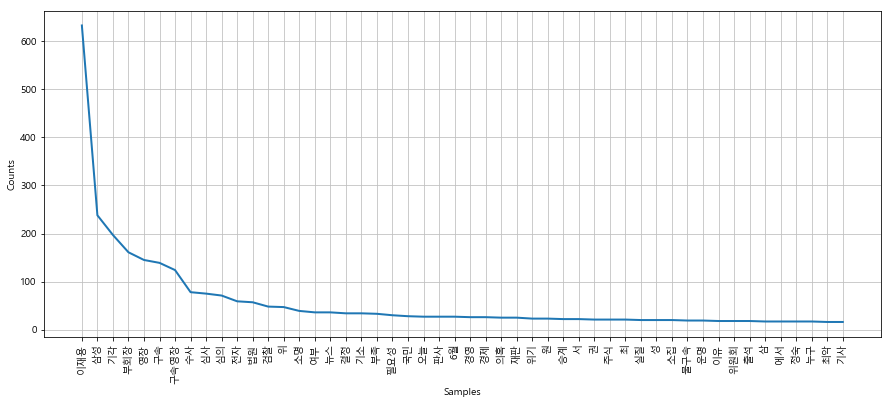

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [232]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [266]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('이재용', 633),
 ('삼성', 238),
 ('기각', 197),
 ('부회장', 161),
 ('영장', 145),
 ('구속', 139),
 ('구속영장', 124),
 ('수사', 78),
 ('심사', 75),
 ('심의', 71),
 ('전자', 59),
 ('법원', 57),
 ('검찰', 48),
 ('위', 47),
 ('소명', 39),
 ('여부', 36),
 ('뉴스', 36),
 ('결정', 34),
 ('기소', 34),
 ('부족', 33),
 ('필요성', 30),
 ('국민', 28),
 ('오늘', 27),
 ('판사', 27),
 ('6월', 27),
 ('경영', 26),
 ('경제', 26),
 ('의혹', 25),
 ('재판', 25),
 ('위기', 23),
 ('원', 23),
 ('승계', 22),
 ('서', 22),
 ('권', 21),
 ('주식', 21),
 ('최', 21),
 ('실질', 20),
 ('성', 20),
 ('소집', 20),
 ('불구속', 19),
 ('운명', 19),
 ('이유', 18),
 ('위원회', 18),
 ('출석', 18),
 ('삼', 17),
 ('에서', 17),
 ('정숙', 17),
 ('누구', 17),
 ('최악', 16),
 ('기사', 16),
 ('면', 16),
 ('시민', 16),
 ('한국', 15),
 ('8일', 15),
 ('전', 15),
 ('판단', 15),
 ('와', 14),
 ('합병', 14),
 ('해야', 13),
 ('날', 13),
 ('청구', 13),
 ('檢', 13),
 ('적', 13),
 ('인가', 13),
 ('없는', 13),
 ('코로나', 13),
 ('문', 12),
 ('선처', 12),
 ('언론', 12),
 ('서울', 12),
 ('윤석열', 12),
 ('법', 12),
 ('그리고', 12),
 ('기로', 12),
 ('종합', 12),
 ('사건', 12),
 ('등', 12)

In [270]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

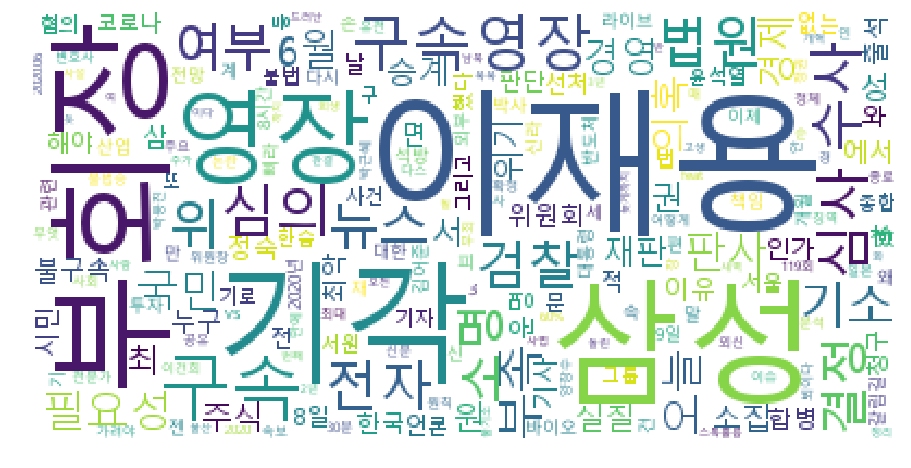

In [272]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()